# Определение успешности игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. 

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Содержание**
1. [Изучение данных из файла](#start)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#analytics)
4. [Составление портрета пользователя каждого региона](#users)
5. [Проверка гипотез](#check)
6. [Общий вывод](#conclusion)

## Изучение данных из файла
<a id="start"></a>

In [ ]:
#загружаем нужные бибилиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
video_data = pd.read_csv('/datasets/games.csv')

In [ ]:
video_data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
video_data.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


**Вывод:**
Представленная таблица содержит 16715 строк и 11 столбцов.  
Столбцы с годом релиза надо будет привести к формату даты, рейтинг пользователей необходимо будет привести к целочисленному типу данных.  Для дальнейшей работы названия столбцов необходимо будет привести к нижнему регистру.  
Столбцы с названием игры, годом релиза, жанром, оценками критиков, оценками пользователй и рейттингом содержат пропуски. Необходимо будет проанализировать причины их возникновений и заполнить при необходимости.  
На этапе обзора данных видно, что самая популярная игра Need for Speed: Most Wanted, платформа - PS2, жанр - Action, оценка пользователей tbd, рейтинг - E.

## Предобработка данных
<a id="preprocessing"></a>

In [ ]:
#Приведем названия столбцов к нижнему регистру 
video_data.columns = [x.lower() for x in video_data.columns]

In [ ]:
video_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
#Проверим пропущенные значения в столбце с названием платформы
video_data.loc[video_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
#У двух игр не определено название и жанр одновременно,восстановить пропущенные значения невозможно, удаляем их из таблицы
video_data.dropna(subset=['name'],inplace=True)

In [ ]:
#Проверяем пропуски в таблице
video_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [ ]:
#Проверим пропущенные значения в столбце с годом
video_data.loc[video_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
#Так как от всей таблицы процент пропусков составляет 1,6% пропущенные значения с годом удалим
video_data.dropna(subset=['year_of_release'],inplace=True)

In [ ]:
#Проверим пропуски
video_data['year_of_release'].isna().sum()

0

In [ ]:
#Приведение к формату int равносильно замене методом to_datetime, т.к. в данном случае у нас используется только год
video_data['year_of_release'] = video_data['year_of_release'].astype('int')

In [ ]:
video_data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

In [ ]:
#Проверим пропущенные значения в столбце с оценкой критиков
video_data.loc[video_data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце "critic_score" имеется почти 50% пропущенных значений, считаю,что заменять их нулем или медианным значением некорректно из-за большого объема данных, что приведет к их значительному искажению.  

Аналогично со столбцами "user_score" и "rating".  
При этом в столбце "user_score" одно из самых частотвстречающихся значений - "tbd" = to be determined. Это означает, что рейтинг должен быть присвоен игре позднее после набора определенного количества оценок от пользователей.  

В рамках проекта заменим данные значения на NaN в связи с тем, что приравнять их к нулю неверно, т.к. 0 - это самая низшая возможная оценка, что приведет к необоснованному появлению большого количества выбросов.

In [ ]:
video_data = video_data.replace('tbd', value = 'NaN')

In [ ]:
#Для дальнейшей работы приведем столбец к числовому значению
video_data['user_score'] = video_data['user_score'].astype('float64')

In [ ]:
#Посчитаем суммарные продажи по всем регионам и выведем их в отдельный столбец
video_data['total_sale'] = video_data['na_sales'] + video_data['eu_sales'] + video_data['jp_sales'] + video_data['other_sales']

In [ ]:
video_data.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
video_data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [ ]:
#Проверим на наличие дубликатов
video_data.duplicated().sum()

0

**Вывод:**  
Привели наименования столбцов к нижнему регистру.  
Удалили игры без названий и без года выхода.  
Все пропуски в столбцах рейтингов оставили без изменений - заменить отсутствующие значения нет возможности.  
Проверили базу на наличие дубликатов - дубликатов нет.


## Исследовательский анализ данных
<a id="analytics"></a>

### Анализ выпуска игр по годам

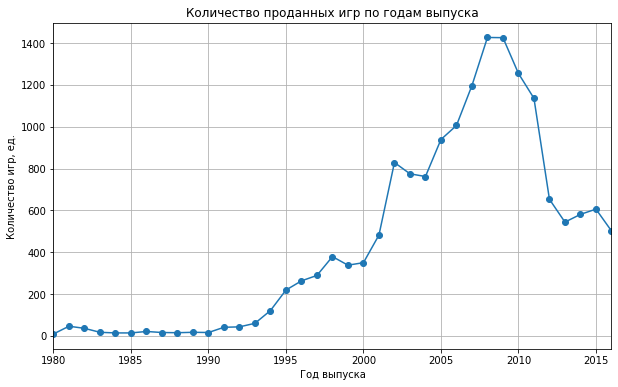

In [ ]:
#Построим график зависимости выхода игр от года
video_data.groupby('year_of_release')['name'] \
    .count().plot(figsize=(10,6),style="-o")

plt.title('Количество проданных игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, ед.')
plt.grid(axis='both')

In [ ]:
#Посчитаем количество вышедших игр в год
video_data.groupby('year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,0,0,9
1981,46,46,46,46,46,46,46,0,0,0,46
1982,36,36,36,36,36,36,36,0,0,0,36
1983,17,17,17,17,17,17,17,0,0,0,17
1984,14,14,14,14,14,14,14,0,0,0,14
1985,14,14,14,14,14,14,14,1,1,1,14
1986,21,21,21,21,21,21,21,0,0,0,21
1987,16,16,16,16,16,16,16,0,0,0,16
1988,15,15,15,15,15,15,15,1,1,1,15


Можно выделить несколько временных периодов по выпуску игр:  
- 1980 - 1993 незначительный выпуск
- 1994 - 2005 постепенный рост темпов продаж
- 2006 - 2011 пик выпуска игр
- 2012 - 2016 снижение темпов продаж

Однако интерес к играм с точки зрения оценки критиков и пользователей резко возрос начиная с 2000 года. 
Пик продаж пришелся на 2008-2009 гг. После этого периода продажи игр стабильно снижаются.

### Анализ продаж по платформам

In [ ]:
#Создадим сводную таблицу по общим продажам
platform_sales = video_data.pivot_table(
    index=['platform'], values=['total_sale'], aggfunc='sum')

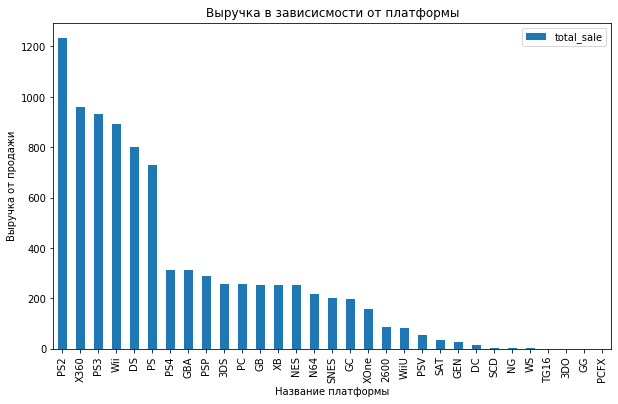

In [ ]:
#Построим график выручки  в зависимости от платформы
platform_sales.sort_values(by='total_sale',ascending=False).plot(kind='bar',figsize=(10,6),title='Выручка в зависисмости от платформы')
plt.xlabel('Название платформы')
plt.ylabel('Выручка от продажи');

Платформы с наибольшими суммарными проджами: PS2, X360, PS3, Wii, DS, Ps. 
Выбраны именно эти платформы, т.к разрыв по продажам значительный именно между PS и PS4

In [ ]:
#Создадим список с самыми популярными платформами
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'Ps']

In [ ]:
#Создадим таблицу по самым популярным платформам
top_platforms = video_data.query('platform == @platforms').reset_index(drop = True)

In [ ]:
top_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [ ]:
#Создадим сводную таблицу по самым популярным платформам по продажам в зависимости от года
toptop_platforms = top_platforms.pivot_table(index='year_of_release', columns='platform', values=['total_sale'],fill_value=0)

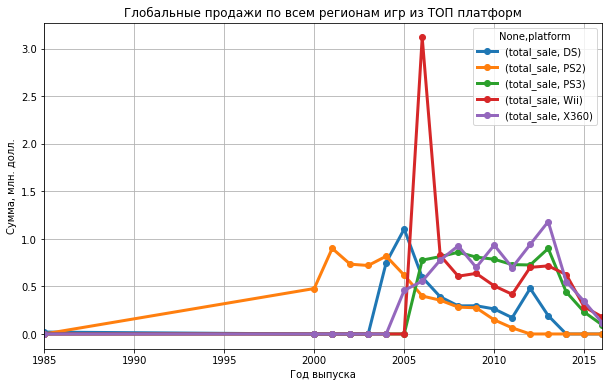

In [ ]:
toptop_platforms.plot(figsize=(10,6), lw=3, style="-o")
plt.title('Глобальные продажи по всем регионам игр из ТОП платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма, млн. долл.')
plt.grid(axis='both')

Платформа в среднем живет 10-12 лет. Пик продаж приходит в среднем через 2-3 года. 

### Актуальный период исследования

Актуальный период исследования - 10 последних лет, с 2007 по 2016 гг. (включительно).  
Если рассматривать тот факт что срок жизни платформ - 10 лет, то если брать период последние 5 лет, в него попадут платформы которые все еще активны на рынке. Поэтому укоротим актуальный период до 5 лет:с 2012 по 2016 (включительно)

In [ ]:
#Создадим актуальную таблицу по критерию, что выпуск игры с 2012 года
actual_data = video_data.query('year_of_release > 2011')

In [ ]:
actual_data.reset_index(inplace=True, drop=True)

In [ ]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Потенциально прибыльные платформы

In [ ]:
actual_data_sales = actual_data.pivot_table(index=['platform'], values=['total_sale'], aggfunc='sum')

In [ ]:
#ТОП-10 платформ по продажам во всех регионах
actual_data_sales = actual_data_sales.sort_values(by='total_sale', ascending=False).head(10)

In [ ]:
actual_data_sales

,total_sale
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [ ]:
#Создадим список с самыми популярными платформами
top10 = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

In [ ]:
top10_platforms = actual_data.query('platform == @top10').reset_index(drop = True)

In [ ]:
top10_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
# Сводная таблица продаж ТОП-10 платформ по годам
year_top10 = top10_platforms.pivot_table(index=['platform', 'year_of_release'], values=['total_sale'], aggfunc='sum') 

In [ ]:
year_top10

total_sale
platform year_of_release            
3DS      2012                  51.36
         2013                  56.57
         2014                  43.76
         2015                  27.78
         2016                  15.14
DS       2012                  11.01
         2013                   1.54
PC       2012                  23.22
         2013                  12.38
         2014                  13.28
         2015                   8.52
         2016                   5.25
PS3      2012                 107.36
         2013                 113.25
         2014                  47.76
         2015                  16.82
         2016                   3.60
PS4      2013                  25.99
         2014                 100.00
         2015                 118.90
         2016                  69.25
PSV      2012                  16.19
         2013                  10.59
         2014                  11.90
         2015                   6.25
         2016                   4.25
Wii      2012                  21.71
         2013                   8.59
         2014                   3.75
         2015                   1.14
         2016                   0.18
WiiU     2012                  17.56
         2013                  21.65
         2014                  22.03
         2015                  16.35
         2016                   4.60
X360     2012                  99.74
         2013                  88.58
         2014                  34.74
         2015                  11.96
         2016                   1.52
XOne     2013                  18.96
         2014                  54.07
         2015                  60.14
         2016                  26.15

In [ ]:
#Для построения график представил таблицу в другом формате
year_top10_plot = year_top10.pivot_table(index='year_of_release', columns='platform', values=['total_sale'], fill_value=0)

In [ ]:
year_top10_plot

total_sale                                                     \
platform               3DS     DS     PC     PS3     PS4    PSV    Wii   WiiU   
year_of_release                                                                 
2012                 51.36  11.01  23.22  107.36    0.00  16.19  21.71  17.56   
2013                 56.57   1.54  12.38  113.25   25.99  10.59   8.59  21.65   
2014                 43.76   0.00  13.28   47.76  100.00  11.90   3.75  22.03   
2015                 27.78   0.00   8.52   16.82  118.90   6.25   1.14  16.35   
2016                 15.14   0.00   5.25    3.60   69.25   4.25   0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2012             99.74   0.00  
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

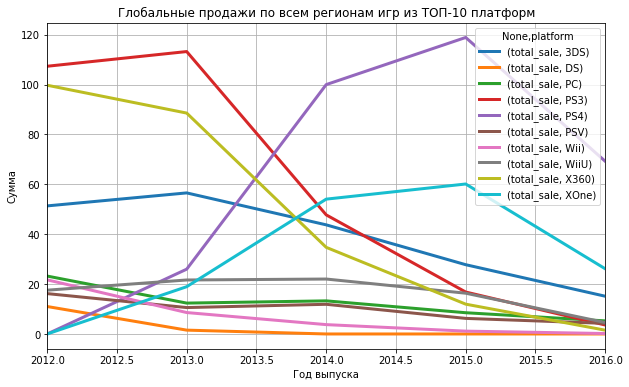

In [ ]:
year_top10_plot.plot(figsize=(10,6), lw=3)
plt.title('Глобальные продажи по всем регионам игр из ТОП-10 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма')
plt.grid(axis='both')

In [ ]:
def year_top10_plot(df, title, xlabel, ylabel):
    df.plot(figsize=(10,6), lw=3)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='both')

По всем платформам снижается глобальная выручка, в том числе в ТОР10 платформ. Самыми успешными по продажам в эти 5 лет были Х360, PS3, PS4.

### Глобальные продажи игр в в разбивке по платформам

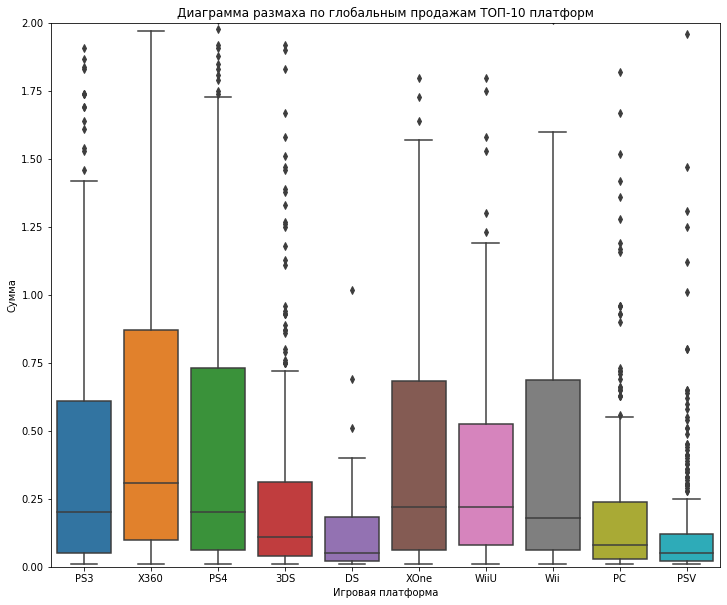

In [ ]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 2)
sns.boxplot(x='platform', y="total_sale", data=top10_platforms)
plt.title('Диаграмма размаха по глобальным продажам ТОП-10 платформ')
plt.ylabel('Сумма')
plt.xlabel('Игровая платформа');

Межквартальный размах очень похож у платфором X360, PS3, PS4. У них примерно одинаковая медиана около 0.28 млн. 3 квартиль заканчивается примерно 0.7 млн. Все распрадаления платформ скошены вправо. Можно сказать, что у всех ящиков медина лежит левее среднего значения. 

### Анализ влияния на продажи в зависимости от оценок критиков и пользователей

In [ ]:
#Выберем самую популярную платформу в исследуемом периоде
actual_data_sales.head(1)

,total_sale
platform,
PS4,314.14


In [ ]:
platform_ps4 = top10_platforms.query('platform == "PS4"')

In [ ]:
platform_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
2641,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
2643,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2651,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
2652,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


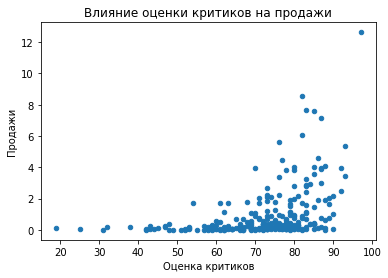

In [ ]:
platform_ps4.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sale', figsize =(6,4))
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
plt.title('Влияние оценки критиков на продажи');

In [ ]:
video_data['user_score'] = video_data['user_score'].astype('float64')

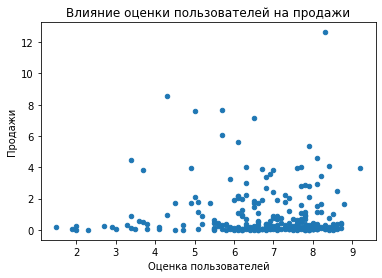

In [ ]:
platform_ps4.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sale', figsize =(6,4))
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')
plt.title('Влияние оценки пользователей на продажи');

Связь между объемами продаж и отзывами критиков и пользователей заметная - лучше продаются те игры на которые больше положительных отзывов. При этом встречаются высокие единичные оценки на игры которые плохо продаются.

In [ ]:
correlation = platform_ps4.corr()

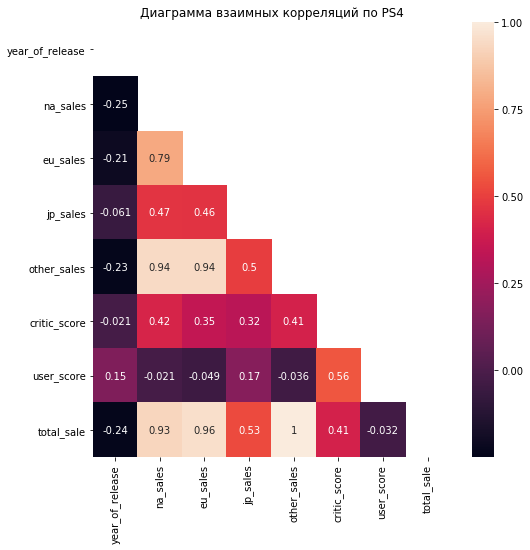

In [ ]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(platform_ps4.corr(), dtype=np.bool)) 
sns.heatmap(correlation,annot=True,mask = mask)
plt.title('Диаграмма взаимных корреляций по PS4');

Высокое значение корреляции между общими продажами и продажами по Северной Америке, Европе = 0,93 - 0,96.
Прямая зависимость общих продаж от продаж в других странах.  
Влияние отзывов критиков на продажи есть, но не такое явное как предполагалось по диаграммам рассеяния. 
Отзывы критиков действительно не сильно влияют на оценки пользователей - тут коэф. корреляции = 0,56.

*Оценим влияние оценок критиков и пользователей на остальные платформы из топ - 10 платформ.*

In [ ]:
other_platforms= top10_platforms.query('platform != "PS4"')

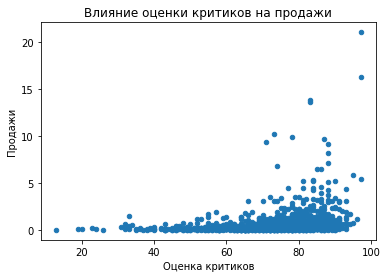

In [ ]:
other_platforms.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sale', figsize =(6,4))
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
plt.title('Влияние оценки критиков на продажи');

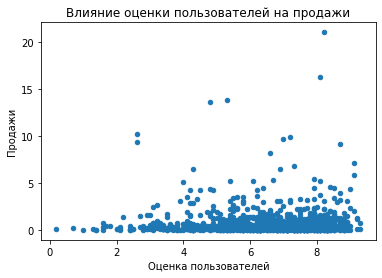

In [ ]:
other_platforms.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sale', figsize =(6,4))
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')
plt.title('Влияние оценки пользователей на продажи');

Аналогично связь между объемами продаж и отзывами критиков и пользователей заметная - лучше продаются те игры на которые больше положительных отзывов.  
Также отзывы критиков и пользователей заметно связаны. Тот же широкий охват вариаций рейтингов, прибавился объем низких рейтингов и отзывов на игры.

In [ ]:
correlation = other_platforms.corr()

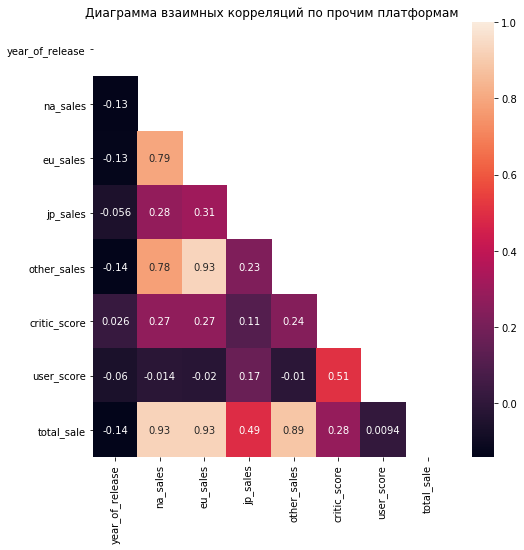

In [ ]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(other_platforms.corr(), dtype=np.bool)) 
sns.heatmap(correlation,annot=True,mask = mask)
plt.title('Диаграмма взаимных корреляций по прочим платформам');

Также высокое значение корреляции между общими продажами и продажами по Северной Америке, Европе и других странах = 0,89 - 0,93 ед.  
Влияние отзывов критиков на продажи стало заметно меньше - 0,28.

### Анализ прибыльности игры в зависимости от жанра

In [ ]:
#Создадим таблица распределения игр по жанрам
genre_sales = actual_data.pivot_table(
    index=['genre'], values=['total_sale', 'name'], aggfunc={'total_sale':'sum', 'name':'count'})

In [ ]:
genre_sales.sort_values(by='total_sale', ascending=False)

,name,total_sale
genre,,
Action,1031,441.12
Shooter,235,304.73
Role-Playing,370,192.80
Sports,268,181.07
Misc,192,85.04
Platform,85,61.00
Racing,115,53.50
Fighting,109,44.49
Simulation,80,35.12


Самые прибыльные жанры - это Action и Shooter, наименее прибыльные - Puzzle и Strategy.

**Вывод:**
Актуальный период исследования последние 5 лет(с 2012 по 2016 включительно).  
По всем платформам снижается глобальная выручка, в том числе в ТОР10 платформ. Самыми успешными по продажам в эти 5 лет были Х360, PS3, PS4.  
При этом оценки критиков и пользователей влияют на продажи игр: продажи по играм с высокими оценками заметно больше. 
Первые по продажам игры в жанре "Action" - 441 млн. долл.Вторые - "Shooter".
Самые плохопродаваемые игры в жанрах "Adventure", "Strategy", "Puzzle"
Игры жанра "Shooter" самые "дорогие"- при меньшем количестве проданных игр(почти в 4 раза), общая сумма продаж незначительно отличается от жанра "Action"

## Составление портрета пользователя каждого региона
<a id="users"></a>

Необходимо определить для пользователя каждого региона(NA,EU,JP):
- самые популярные платформы(топ-5)
- самые популярные жанры(топ-5)
- влияние рейтинга ESRB на продажи в отдельном регионе

*Самые популярные платформы*

In [ ]:
#Северная Америка
platform_na = actual_data.pivot_table(index='platform',values=['na_sales','total_sale'],aggfunc=('sum'))
platform_na = platform_na.sort_values(by='na_sales',ascending=False).head(5)

In [ ]:
platform_na.rename(columns={'na_sales':'sales'}, inplace ='True')

In [ ]:
platform_na

,sales,total_sale
platform,,
X360,140.05,236.54
PS4,108.74,314.14
PS3,103.38,288.79
XOne,93.12,159.32
3DS,55.31,194.61


In [ ]:
#Европа
platform_eu = actual_data.pivot_table(index='platform',values=['eu_sales','total_sale'],aggfunc=('sum'))
platform_eu = platform_eu.sort_values(by='eu_sales',ascending=False).head(5)

In [ ]:
platform_eu.rename(columns={'eu_sales':'sales'}, inplace ='True')

In [ ]:
platform_eu

,sales,total_sale
platform,,
PS4,141.09,314.14
PS3,106.86,288.79
X360,74.52,236.54
XOne,51.59,159.32
3DS,42.64,194.61


In [ ]:
#Япония
platform_jp = actual_data.pivot_table(index='platform',values=['jp_sales','total_sale'],aggfunc=('sum'))
platform_jp = platform_jp.sort_values(by='jp_sales',ascending=False).head(5)

In [ ]:
platform_jp.rename(columns={'jp_sales':'sales'}, inplace ='True')

In [ ]:
platform_jp

,sales,total_sale
platform,,
3DS,87.79,194.61
PS3,35.29,288.79
PSV,21.04,49.18
PS4,15.96,314.14
WiiU,13.01,82.19


In [ ]:
#Создадим цикл,который в каждую таблицу добавит колонку с долей продаж
for column in [platform_jp,platform_eu,platform_na]:
    column['percent'] = column['sales']/column['total_sale']
    column['percent'] = column['percent'].round(2)

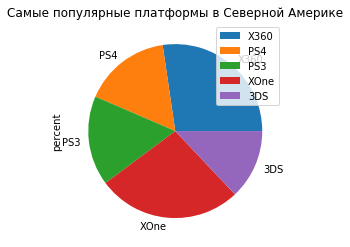

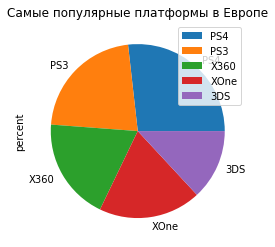

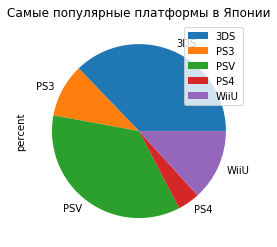

In [ ]:
platform_na.plot(kind='pie',y="percent")
plt.title('Самые популярные платформы в Северной Америке')
platform_eu.plot(kind='pie',y="percent")
plt.title('Самые популярные платформы в Европе')
platform_jp.plot(kind='pie', y="percent")
plt.title('Самые популярные платформы в Японии');

В Северной Америке и Европе набор ТОП-5 платформ один и тот же, разница только в распределении мест.
В Северной Америке на первом месте платформа X360, в Европе - PS4.
В Японии на первом местес большим отрывом 3DS.

*Самые популярные жанры*

In [ ]:
na_sales_genre=actual_data.pivot_table(index='genre',values=['na_sales'],aggfunc=('sum'))

In [ ]:
na_sales_genre=na_sales_genre.sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [ ]:
eu_sales_genre=actual_data.pivot_table(index='genre',values=['eu_sales'],aggfunc=('sum'))

In [ ]:
eu_sales_genre=eu_sales_genre.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_genre

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [ ]:
jp_sales_genre=actual_data.pivot_table(index='genre',values=['jp_sales'],aggfunc=('sum'))

In [ ]:
jp_sales_genre=jp_sales_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


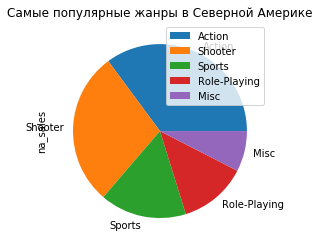

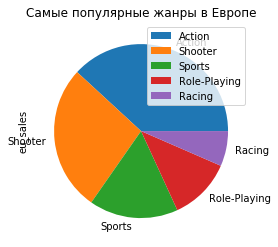

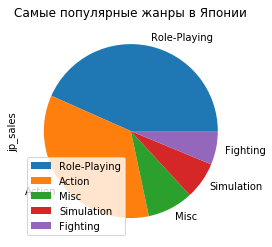

In [ ]:
na_sales_genre.plot(kind='pie',y="na_sales")
plt.title('Самые популярные жанры в Северной Америке')
eu_sales_genre.plot(kind='pie',y="eu_sales")
plt.title('Самые популярные жанры в Европе')
jp_sales_genre.plot(kind='pie',y="jp_sales")
plt.title('Самые популярные жанры в Японии');

В Северной Америке и Европе набор ТОП-5 жанров одинаков по составу и по распределению мест в топе (за исключением 5 места).
  1. Action 
  2. Shooter
  3. Sports
  4. Role-Playing
  5.  Misc / Racing    
В Японии свои предпочтения - на первом месте Role-Playing, далее два жанра - Action и Misc из первой пятерки других регионов и два последних Simulation и Fighting.
Распределение в долях между жанрами из ТОП-5 примерно одинаковое во всех регионах. За исключением Японии - тут 1 и 2 место идет со значительным отрывом от других жанров.

*Влияние рейтинга ESRB на продажи в отдельном регионе*

In [ ]:
na_sales_esrb=actual_data.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))

In [ ]:
na_sales_esrb=na_sales_esrb.sort_values(by='na_sales',ascending=False)
na_sales_esrb

,na_sales
rating,
M,231.57
E,114.37
E10+,75.70
T,66.02


In [ ]:
eu_sales_esrb=actual_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))

In [ ]:
eu_sales_esrb=eu_sales_esrb.sort_values(by='eu_sales',ascending=False)
eu_sales_esrb

,eu_sales
rating,
M,193.96
E,113.03
E10+,55.37
T,52.96


In [ ]:
jp_sales_esrb=actual_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))

In [ ]:
jp_sales_esrb=jp_sales_esrb.sort_values(by='jp_sales',ascending=False)
jp_sales_esrb

,jp_sales
rating,
E,28.33
T,26.02
M,21.20
E10+,8.19


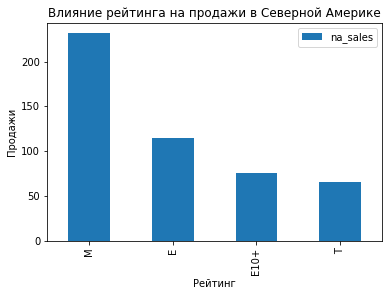

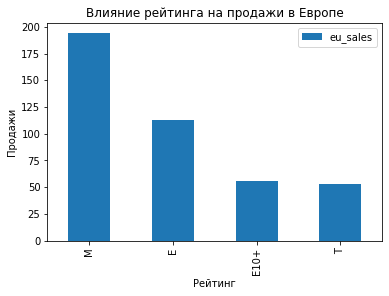

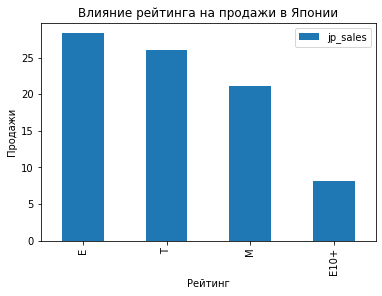

In [ ]:
na_sales_esrb.plot(kind='bar') # гисторгамма продаж по возрастным ограничений для С. Америки
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.title('Влияние рейтинга на продажи в Северной Америке')
eu_sales_esrb.plot(kind='bar') # гисторгамма продаж по возрастным ограничений для Европы
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.title('Влияние рейтинга на продажи в Европе')
jp_sales_esrb.plot(kind='bar') # гисторгамма продаж по возрастным ограничений для Японии
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.title('Влияние рейтинга на продажи в Японии');

В Европе и Северной Америке самые продаваемые игры имеют рейтинг M, т.е для взрослых. Далее последовательно Е и Е 10+ и Т, что говорит о том,что в данных странах рейтинг игры не влияет на ее продаваемость.
В Японии на первом месте идут продажи игр для всех, далее для подростков, что говорит о том, что в данном регионе рейтинг имеет влияние.

**Вывод:**  
В Северной Америке и Европе набор ТОП-5 жанров одинаков по составу и по распределению мест в топе (за исключением 5 места).
  1. Action 
  2. Shooter
  3. Sports
  4. Role-Playing
  5.  Misc / Racing    

В Японии свои предпочтения - на первом месте Role-Playing, далее два жанра - Action и Misc из первой пятерки других регионов и два последних Simulation и Fighting.
Распределение в долях между жанрами из ТОП-5 примерно одинаковое во всех регионах. За исключением Японии - тут 1 и 2 место идет со значительным отрывом от других жанров.  
В Европе и Северной Америке самые продаваемые игры имеют рейтинг M, т.е для взрослых. Далее последовательно Е и Е 10+ и Т, что говорит о том,что в данных странах рейтинг игры не влияет на ее продаваемость.
В Японии на первом месте идут продажи игр для всех, далее для подростков, что говорит о том, что в данном регионе рейтинг имеет влияние.

## Проверка гипотез 
<a id="check"></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Исходя из формулировки гипотезы принимаем нулевую гипотезу H₀ как  
*Средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформы PC*  

H1: 
*Средние пользовательские рейтинги платформ Xbox One не равны средним пользовательским рейтингам платформы PC*
Уровень значимости (пороговое значение) установим как 5% (как общепринятый параметр).

In [ ]:
xone=actual_data[(actual_data['platform']=='XOne')&(actual_data['user_score']>0)]['user_score']

In [ ]:
pc=actual_data[(actual_data['platform']=='PC')&(actual_data['user_score']>0)]['user_score']

In [ ]:
alpha = 0.05

result=st.ttest_ind(xone,pc) 
print('Значение p-value:', result.pvalue)

Значение p-value: 0.5535080500643661


In [ ]:
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


**Отвергнуть нулевую гипотезу не вышло.Средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформы PC со статистической значимостью alpha=5%.**

### Средние пользовательские рейтинги жанров Action и Sports разные.

Исходя из формулировки гипотезы принимаем нулевую гипотезу H₀ как:  
*Средние пользовательские рейтинги жанров Action и Sports не одинаковы*

H1: *Средние пользовательские рейтинги жанров Action и Sports одинаковы*

Уровень значимости (пороговое значение) установим как 5% (общепринятый параметр)

In [ ]:
action=actual_data[(actual_data['genre']=='Action')&(actual_data['user_score']>0)]['user_score']

In [ ]:
sports=actual_data[(actual_data['genre']=='Sports')&(actual_data['user_score']>0)]['user_score']

In [ ]:
alpha = 0.05

result=st.ttest_ind(action,sports) 
print('Значение p-value:', result.pvalue)

Значение p-value: 3.7163089460934874e-26


In [ ]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

NameError: name 'results' is not defined

**Отвергнуть нулевую гипотезу не вышло.Средние пользовательские рейтинги жанров Action и Sports не одинаковы со статистической значимостью alpha=5%.**

## Общий вывод
<a id="conclusion"></a>

На первом этапе исследования были рассмотрены предоставленные данные. Таблица содержит значительное количество пропусков(почти половину) в стоблцах с оценками критиков и пользователей, а также рейтингом. Чтобы не искажать возможные результаты пропуски дополнительно не заменялись.

На втором этапе исследования была проведена предобработка данных: названия столбцов приведены к нижнему регистру, заменены типы данных, заполнены пропуски в ряде столбцов. Дополнительно был расчитан столбец с продажей по всем регионам суммарно.

На третьем этапе был определен актуальный период: с 2012 по 2016 год включительно. Самыми успешными по продажам в эти 5 лет были Х360, PS3, PS4. При этом по всем платформам снижается глобальная выручка.  
При этом оценки критиков и пользователей влияют на продажи игр: продажи по играм с высокими оценками заметно больше. 
Первые по продажам игры в жанре "Action" - 441 млн. долл.Вторые - "Shooter".
Самые плохопродаваемые игры в жанрах "Adventure", "Strategy", "Puzzle"
Игры жанра "Shooter" самые "дорогие"- при меньшем количестве проданных игр(почти в 4 раза), общая сумма продаж незначительно отличается от жанра "Action"

На четвертом этапе выявлено поведение пользователей в зависимости от региона.  
В Северной Америке и Европе набор ТОП-5 жанров одинаков по составу и по распределению мест в топе (за исключением 5 места).
  1. Action 
  2. Shooter
  3. Sports
  4. Role-Playing
  5.  Misc / Racing    

В Японии свои предпочтения - на первом месте Role-Playing, далее два жанра - Action и Misc из первой пятерки других регионов и два последних Simulation и Fighting.
Распределение в долях между жанрами из ТОП-5 примерно одинаковое во всех регионах. За исключением Японии - тут 1 и 2 место идет со значительным отрывом от других жанров.  
В Европе и Северной Америке самые продаваемые игры имеют рейтинг M, т.е для взрослых. Далее последовательно Е и Е 10+ и Т, что говорит о том,что в данных странах рейтинг игры не влияет на ее продаваемость.
В Японии на первом месте идут продажи игр для всех, далее для подростков, что говорит о том, что в данном регионе рейтинг имеет влияние.

На пятом этапе проверили две гипотезы.
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Отвергнуть нулевую гипотезу не вышло.Средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформы PC со статистической значимостью alpha=5%.
- Средние пользовательские рейтинги жанров Action и Sports разные
Отвергнуть нулевую гипотезу не вышло.Средние пользовательские рейтинги жанров Action и Sports не одинаковы со статистической значимостью alpha=5%.

Анализируя будующие продажи на 2017 год можно с уверенностью сказать, что продажи можно получить у платформ '3DS','PS3','PS4','X360','XOne'.Что касается жанров, то тут самые продаваемые Action, Sport, Shooter.